### Steps
# Create 3 folder  traing, testing and validation.
# Training( 2 folder happy and not happy)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pylab as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
img = image.load_img(r'C:\Users\FATHIMA\Desktop\Datasceience_NareshIT\May\10th - CNN - Happy  or Sad\Mywork\CNN - Happy  or Sad\Training\happy\1.png')

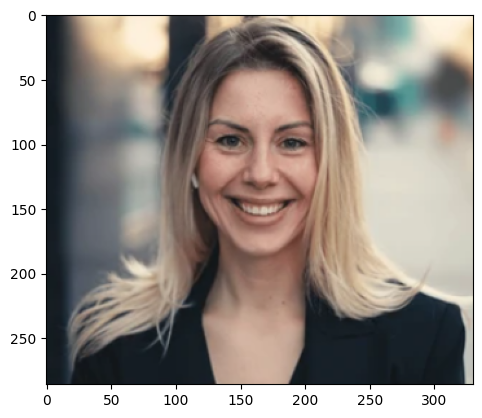

In [3]:
plt.imshow(img)

In [4]:
i1= cv2.imread(r'C:\Users\FATHIMA\Desktop\Datasceience_NareshIT\May\10th - CNN - Happy  or Sad\Mywork\CNN - Happy  or Sad\Training\happy\1.png')
i1

array([[[ 35,  28,  20],
        [ 34,  27,  19],
        [ 35,  27,  19],
        ...,
        [228, 249, 255],
        [228, 248, 255],
        [227, 246, 255]],

       [[ 35,  28,  20],
        [ 34,  27,  19],
        [ 35,  27,  19],
        ...,
        [226, 246, 254],
        [224, 245, 254],
        [223, 244, 253]],

       [[ 35,  28,  20],
        [ 34,  27,  19],
        [ 35,  27,  19],
        ...,
        [224, 243, 254],
        [220, 241, 253],
        [217, 241, 253]],

       ...,

       [[ 32,  28,  19],
        [ 32,  28,  19],
        [ 33,  28,  19],
        ...,
        [189, 200, 201],
        [188, 197, 198],
        [188, 196, 197]],

       [[ 32,  27,  20],
        [ 33,  27,  19],
        [ 33,  27,  19],
        ...,
        [188, 200, 200],
        [187, 198, 198],
        [187, 196, 197]],

       [[ 35,  27,  21],
        [ 35,  28,  21],
        [ 35,  28,  20],
        ...,
        [188, 200, 199],
        [186, 197, 196],
        [186, 196, 195]]

In [5]:
i1.shape  

(286, 330, 3)

In [6]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset=train.flow_from_directory(r'C:\Users\FATHIMA\Desktop\Datasceience_NareshIT\May\10th - CNN - Happy  or Sad\Mywork\CNN - Happy  or Sad\Training',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')


Found 10 images belonging to 2 classes.


In [8]:
validation_dataset=validation.flow_from_directory(r'C:\Users\FATHIMA\Desktop\Datasceience_NareshIT\May\10th - CNN - Happy  or Sad\Mywork\CNN - Happy  or Sad\Validation',
                                                  target_size=(200,200),
                                                  batch_size=3,
                                                  class_mode='binary')

Found 2 images belonging to 2 classes.


In [9]:
 train_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [11]:
validation_dataset.classes

array([0, 1])

# sequential -> linear stack of layers
# Conv2D -> covolutions layer

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),   #2*2 matrix
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(), #Flatten will make single neuron vector. once you create linear vector next dense connected relu again
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# model.summary()

C:\Users\FATHIMA\anaconda3\envs\tensorflow_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss='binary_crossentropy', #use for binary classification
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['acc'])

In [14]:
# model_fit = model.fit(train_dataset,
#                       epochs = 10,
#                       validation_data = validation_dataset)
# print(len(train_dataset))  # Should print a number > 0

model_fit=model.fit(train_dataset,
                    # epochs = 1,
                   steps_per_epoch=3,
                   epochs=10,
                   validation_data=validation_dataset) 

Epoch 1/10


C:\Users\FATHIMA\anaconda3\envs\tensorflow_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 615ms/step - acc: 0.4554 - loss: 1.0265 - val_acc: 1.0000 - val_loss: 0.4973
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - acc: 0.3333 - loss: 0.7403 - val_acc: 1.0000 - val_loss: 0.5281


C:\Users\FATHIMA\anaconda3\envs\tensorflow_env\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - acc: 0.7857 - loss: 0.6567 - val_acc: 0.5000 - val_loss: 0.5480
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - acc: 0.3333 - loss: 0.7051 - val_acc: 0.5000 - val_loss: 0.5289
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - acc: 0.7232 - loss: 0.6083 - val_acc: 1.0000 - val_loss: 0.4742
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - acc: 0.3333 - loss: 0.7107 - val_acc: 1.0000 - val_loss: 0.4524
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - acc: 0.8869 - loss: 0.5507 - val_acc: 1.0000 - val_loss: 0.3343
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - acc: 0.0000e+00 - loss: 0.8664 - val_acc: 0.5000 - val_loss: 0.5429
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - acc: 0.7321 - loss: 0.6521 - val_acc: 1.0000 - val_loss: 0.3686
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - acc: 0.6667 - loss: 0.6003 - val_acc: 1.0000 - val_loss: 0.3565


In [15]:
dir_path = r'C:\Users\FATHIMA\Desktop\Datasceience_NareshIT\May\10th - CNN - Happy  or Sad\Mywork\CNN - Happy  or Sad\Testing'

for i in os.listdir(dir_path ):
    print(i)

1.png
10.png
2.png
3.png
4.png
5.png
6.png
7.png
8.png
9.png


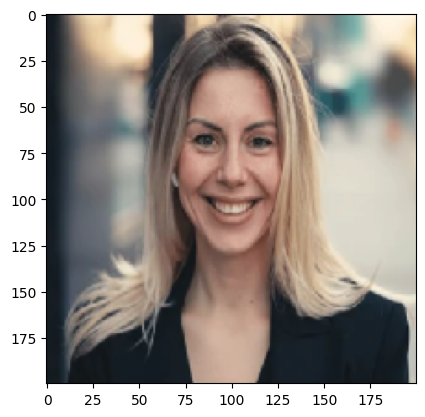

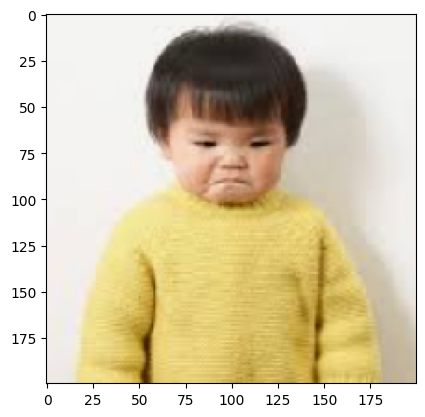

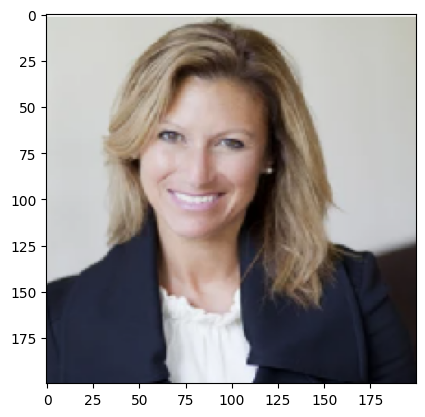

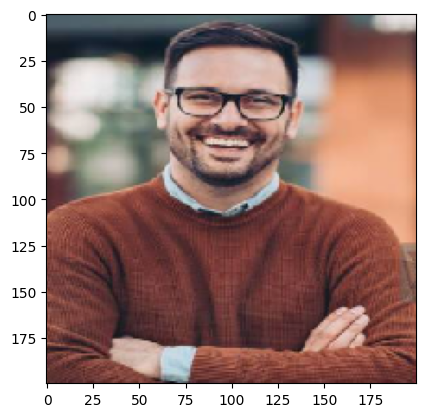

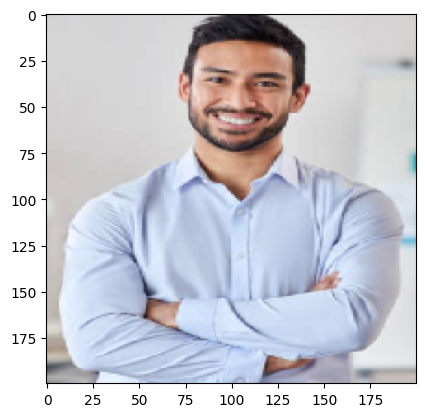

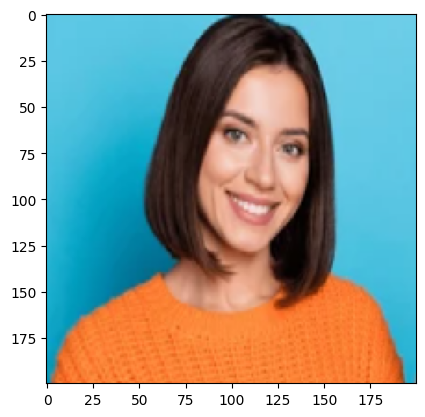

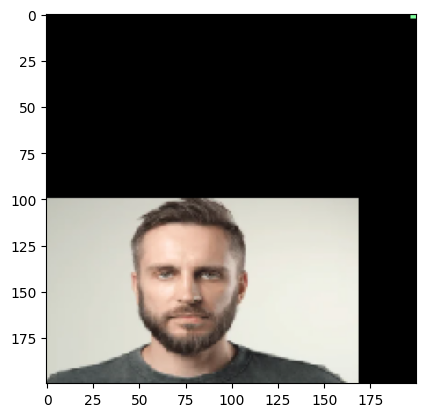

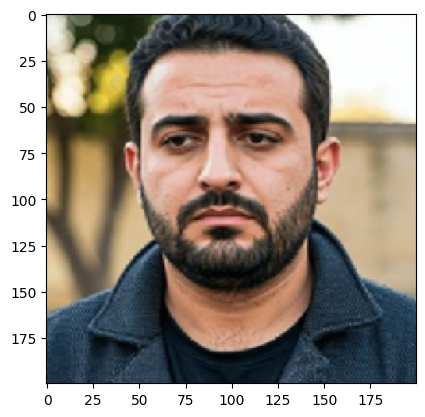

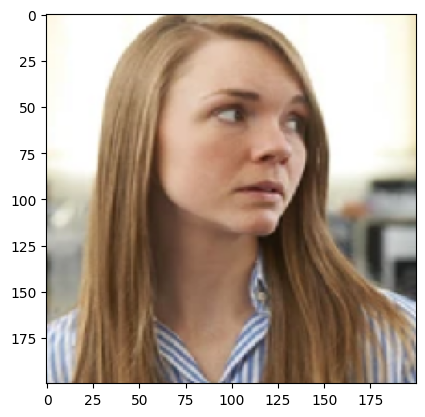

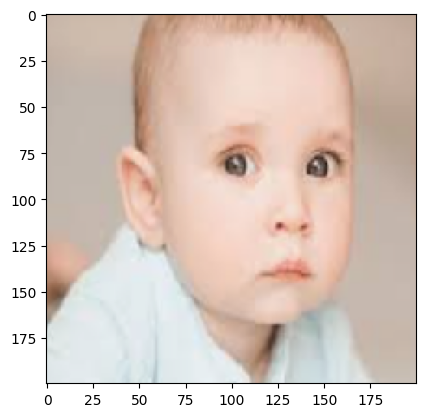

In [16]:
dir_path = r'C:\Users\FATHIMA\Desktop\Datasceience_NareshIT\May\10th - CNN - Happy  or Sad\Mywork\CNN - Happy  or Sad\Testing'

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

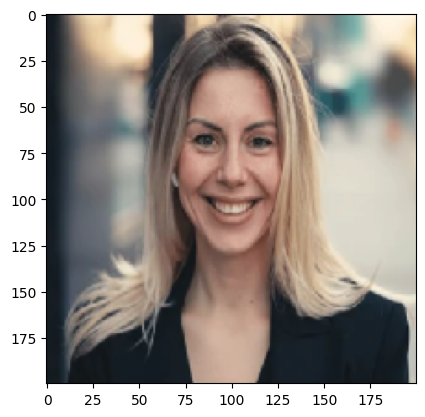

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
 i am happy
Model output: 0.0000


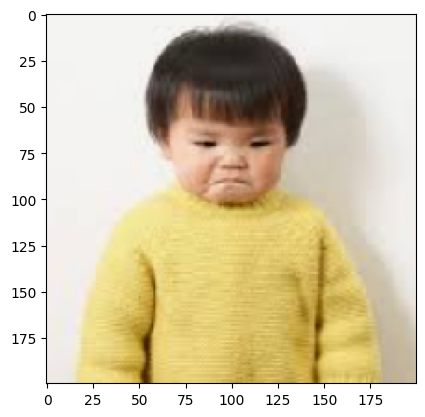

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
i am not happy
Model output: 0.0000


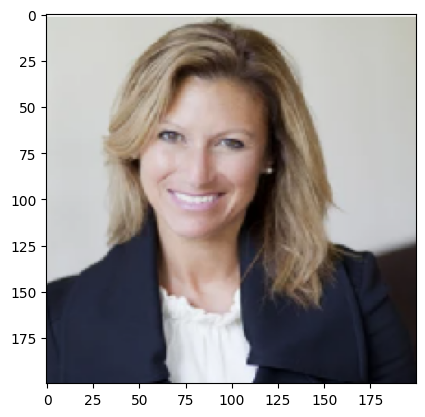

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
 i am happy
Model output: 0.0000


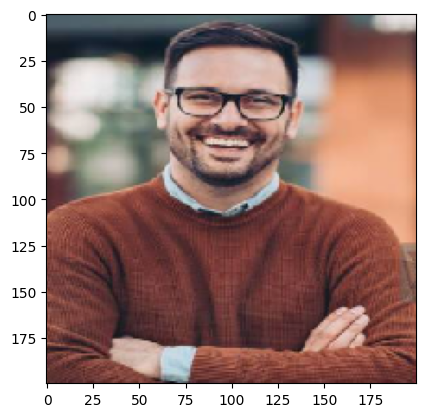

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
 i am happy
Model output: 0.0000


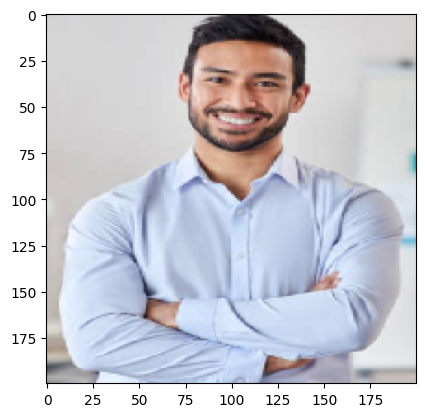

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
i am not happy
Model output: 0.0000


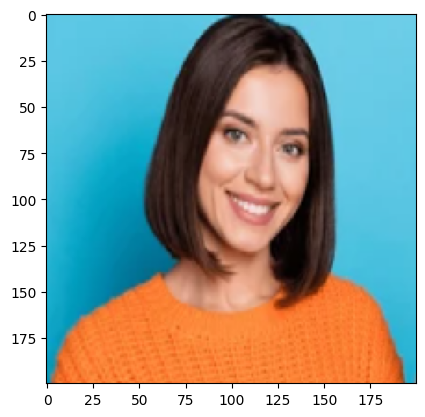

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
 i am happy
Model output: 0.0000


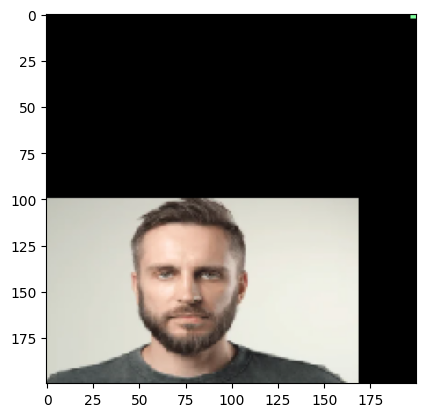

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
i am not happy
Model output: 1.0000


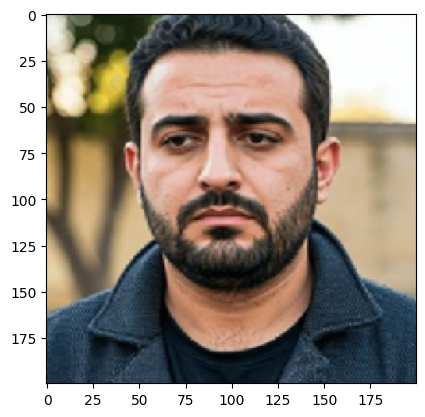

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
i am not happy
Model output: 0.0000


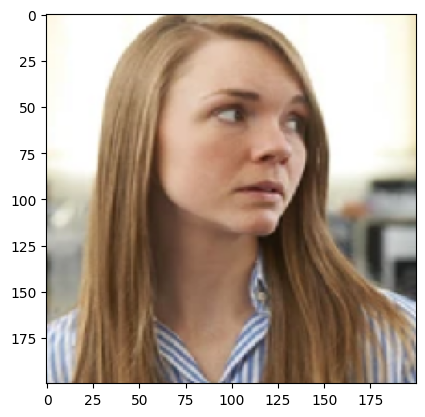

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
i am not happy
Model output: 0.0000


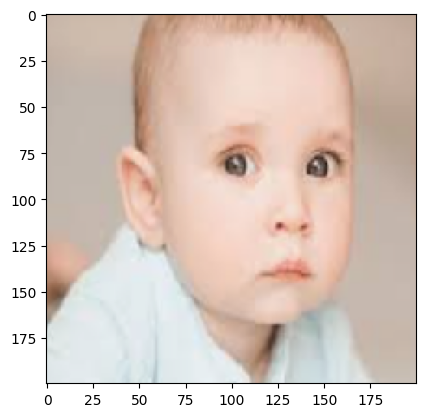

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
i am not happy
Model output: 0.0000


In [19]:
dir_path = r'C:\Users\FATHIMA\Desktop\Datasceience_NareshIT\May\10th - CNN - Happy  or Sad\Mywork\CNN - Happy  or Sad\Testing'

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()
        
    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    # x = x / 255.0  # MUST normalize just like during training

    images = np.vstack([x])
    
    val = model.predict(images)
    if val == 0:
        print( ' i am happy')
    else:
        print('i am not happy')
    print(f"Model output: {val[0][0]:.4f}")
    # if val[0][0] <= 0.5:
    #     print("😊 I am happy")
    # else:
    #     print("😞 I am not happy")

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step - acc: 0.4940 - loss: 0.6348 - val_acc: 1.0000 - val_loss: 0.3186
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - acc: 0.3333 - loss: 0.7724 - val_acc: 1.0000 - val_loss: 0.3671
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - acc: 0.5774 - loss: 0.5707 - val_acc: 1.0000 - val_loss: 0.3307
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - acc: 0.6667 - loss: 0.6173 - val_acc: 1.0000 - val_loss: 0.3189
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - acc: 0.9286 - loss: 0.3621 - val_acc: 1.0000 - val_loss: 0.2481
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - acc: 0.0000e+00 - loss: 1.0547 - val_acc: 1.0000 - val_loss: 0.3900
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - acc: 0.6905 - loss: 0.5656 - val_acc: 1.0000 - val_loss: 0.3373
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - acc: 1.0000 - loss: 0.5060 - val_acc: 1.0000 - val_loss: 0.3189
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - acc: 0.7946 - loss

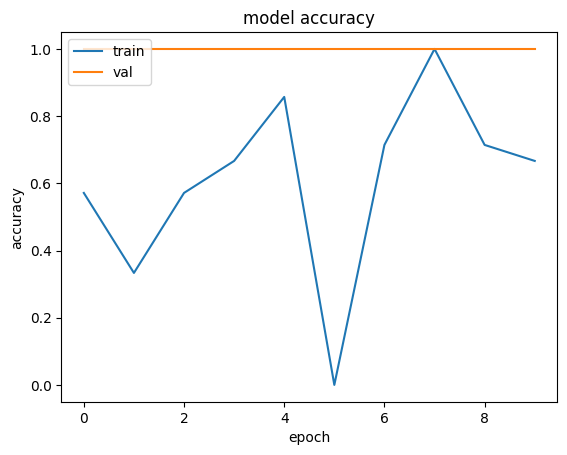

In [22]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
history=model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=10,validation_data=validation_dataset) 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
history.history??

Type:        dict
String form: {'acc': [0.5714285969734192, 0.3333333432674408, 0.5714285969734192, 0.6666666865348816, 0.8571428656578064, 0.0, 0.7142857313156128, 1.0, 0.7142857313156128, 0.6666666865348816], 'loss': [0.624298632144928, 0.772426187992096, 0.5782252550125122, 0.6173326373100281, 0.428077757358551, 1.054665207862854, 0.5305675864219666, 0.5059738159179688, 0.4749681055545807, 0.6506091952323914], 'val_acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.31861355900764465, 0.36706680059432983, 0.33067187666893005, 0.31885015964508057, 0.24811065196990967, 0.38998153805732727, 0.3372962474822998, 0.31893643736839294, 0.3329867124557495, 0.2576993405818939]}
Length:      4
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initia

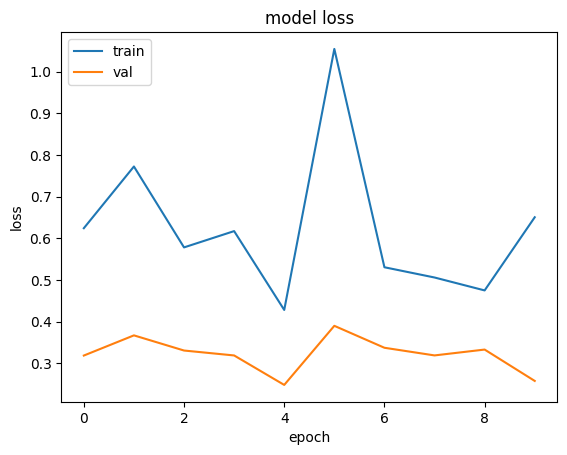

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()